In [155]:
# warnings 무시
import warnings
warnings.filterwarnings(action='ignore')

import scipy as sp
import scipy.stats
import statsmodels.api as sm
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

### Scikit-Learn의 BOW인코더
Countvectiorizer가 가장 많이 사용됨

- DictVectorizer:각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.
- CountVectorizer:문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.
- TfidfVectorizer:CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.
- HashingVectorizer:해시 함수(hash function)을 사용하여 적은 메모리와 빠른 속도로 BOW 인코딩 벡터를 만든다.

#### Vectorizer클래스 기능
CountVectorizer는 다음과 같은 세가지 작업을 수행한다
1. 문서를 토큰 리스트로 반환
2. 각 문서에서 토큰의 출현 빈도를 센다
43. 각 문서를BOW인코딩 벡터로 변환

#### Vectorizer 클래스 사용법
1. 클래스 객체 생성
2. 말뭉치를 넣고 `fit` 메서드 실행
3. `vocabulary_` 속성에 단어장이 자동 생성됨
4. `transform` 메서드로 다른 문서를 BOW 인코딩
)5. BOW 인코딩 결과는 Sparse 행렬로 만들어지므로 `toarray` 메서드로 보통 행렬로 변환( 0이아닌 부분만 저장하는 

#### Vectorizer 인수
다음과 같은 인수를 가질 수 있다. 

* `stop_words` : 문자열 {‘english’}, 리스트 또는 None (디폴트)
 * stop words 목록.‘english’이면 영어용 스탑 워드 사용.


* `max_df` : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
 * 단어장에 포함되기 위한 최대 빈도


* `min_df` : 정수 또는 [0.0, 1.0] 사이의 실수.  디폴트 1
 * 단어장에 포함되기 위한 최소 빈도 
 
 
* `ngram_range` : (min_n, max_n) 튜플
 * n-그램 범위 


* `analyzer` : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
 * 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램 


* `token_pattern` : string
 * 토큰 정의용 정규 표현식 


* `tokenizer` : 함수 또는 None (디폴트)
 * 토큰 생성 함수 .


## N-그램

* 단어나 형태소에서 토큰을 생성할 때

  * 1개의 단어로 하나의 토큰을 만들면 : 모노그램 (monogram, 1-gram)
  * 2개의 단어로 하나의 토큰을 만들면 : 바이그램 (bigram, 2-gram)
  * 3개의 단어로 하나의 토큰을 만들면 : 트라이그램 (trigram, 3-gram)
  


* I + am + a + boy

 * 1-gram: "I", "am", "a", "boy"
 * 2-gram: "I am", "am a", "a boy"
 * 3-gram: "I am a", "am a boy" 

## TF-IDF 인코딩

TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다. 


구제적으로는 문서 $d$(document)와 단어 $t$ 에 대해 다음과 같이 계산한다.

$$ \text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(t) $$


여기에서

* $\text{tf}(d, t)$: term frequency. 특정한 단어의 빈도수
* $\text{idf}(t)$ : inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수
 
 $$ \text{idf}(d, t) = \log \dfrac{n}{1 + \text{df}(t)} $$
 
* $n$ : 전체 문서의 수
* $\text{df}(t)$:  단어 $t$를 가진 문서의 수

In [5]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# 비율에 중요도가 합쳐진것
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

## 해시 트릭 (Hash Trick)

* `CountVectorizer`는 모든 작업을 메모리 상에서 수행

* 처리할 문서의 크기가 커지면 단어장 딕셔너리가 커진다.

* 실행 속도가 느려지거나 실행이 불가능해진다. 




* `HashingVectorizer`를 사용하면 해시 함수(Hash function)를 사용

* 단어에 대한 인덱스 번호를 수식으로 생성

* 사전 메모리가 없고 및 실행 시간을 줄일 수 있다.

* 단어의 충돌이 있을 수 있다.(ex) boy도 3번 girl도 3번이 나오는경우 있을수도)

##  Gensim 패키지

* Bag Of Words 인코딩
* TF-IDF 인코딩
* 토픽 모델링

## Gensim의 BOW 인코딩 기능

* `Dictionary` 클래스 이용

  * `token2id` 속성으로 사전 저장
  * `doc2bow` 메서드로 BOW 인코딩
  
  
* `TfidfModel` 클래스를 이용하면 TF-IDF 인코딩도 가능

## 실습 8: Gensim의 BOW 인코딩

### step 1: 말뭉치 만들기

In [8]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

### step 2: 토큰 리스트 생성

In [10]:
token_list=[[text for text in doc.split()]for doc in corpus]
token_list

[['This', 'is', 'the', 'first', 'document.'],
 ['This', 'is', 'the', 'second', 'second', 'document.'],
 ['And', 'the', 'third', 'one.'],
 ['Is', 'this', 'the', 'first', 'document?'],
 ['The', 'last', 'document?']]

### step 3: Dictionary 객체 생성

In [12]:
from gensim.corpora import Dictionary

dictionary=Dictionary(token_list)
dictionary.token2id

{'This': 0,
 'document.': 1,
 'first': 2,
 'is': 3,
 'the': 4,
 'second': 5,
 'And': 6,
 'one.': 7,
 'third': 8,
 'Is': 9,
 'document?': 10,
 'this': 11,
 'The': 12,
 'last': 13}

### step 4: BOW 인코딩

In [16]:
term_matrix=[dictionary.doc2bow(token)for token in token_list]
term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (3, 1), (4, 1), (5, 2)],
 [(4, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (4, 1), (9, 1), (10, 1), (11, 1)],
 [(10, 1), (12, 1), (13, 1)]]

### step 5: TF-IDF 인코딩

In [17]:
from gensim.models import TfidfModel

tfidf = TfidfModel(term_matrix)

for doc in tfidf[term_matrix]:
    print("doc:")
    for k, v in doc:
        print(k, v)

doc:
0 0.49633406058198626
1 0.49633406058198626
2 0.49633406058198626
3 0.49633406058198626
4 0.12087183801361165
doc:
0 0.25482305694621393
1 0.25482305694621393
3 0.25482305694621393
4 0.0620568558708622
5 0.8951785160431313
doc:
4 0.07979258234193365
6 0.5755093812740171
7 0.5755093812740171
8 0.5755093812740171
doc:
2 0.3485847413542797
4 0.08489056411237639
9 0.6122789185961829
10 0.3485847413542797
11 0.6122789185961829
doc:
10 0.37344696513776354
12 0.6559486886294514
13 0.6559486886294514


## 실습 4: 토픽 모델링 실습

corpus에서 토픽을 뽑아내는것

### step 1: 텍스트 데이터 다운로드

In [18]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(
    categories=["comp.graphics", "rec.sport.baseball", "sci.med"])

#### step 2: 명사 추출

In [19]:
%%time
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = [pos_tag(word_tokenize(doc)) for doc in newsgroups.data]
nouns_list = [[t[0].lower() for t in doc if t[1].startswith("N")] for doc in tagged_list]

Wall time: 35.5 s


#### step 3: 표제어 추출 

In [20]:
from nltk.stem import WordNetLemmatizer

In [22]:
lm = WordNetLemmatizer()

token_list = [[lm.lemmatize(w, pos="n") for w in doc] for doc in nouns_list]

#### step4: 불용어 제거

In [23]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words += ["", "subject", "article", "line", "lines", "year", "month", 
               "address", "keyword", "msg"]

token_list = [[word for word in doc if (word not in stop_words) and (2 < len(word) < 10)] for doc in token_list]

### step 5: 토픽 모델링

In [24]:
from gensim import corpora

dictionary = corpora.Dictionary(token_list)
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in token_list]

In [25]:
%%time
from gensim.models.ldamodel import LdaModel

model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, passes=10)

Wall time: 25.5 s


In [26]:
model.print_topics()

[(0,
  '0.007*"science" + 0.007*"point" + 0.007*"bank" + 0.006*"geb" + 0.005*"gordon" + 0.004*"game" + 0.004*"way" + 0.004*"people" + 0.004*"team" + 0.004*"computer"'),
 (1,
  '0.007*"food" + 0.007*"time" + 0.005*"people" + 0.005*"health" + 0.004*"disease" + 0.004*"problem" + 0.004*"anyone" + 0.004*"number" + 0.004*"program" + 0.004*"day"'),
 (2,
  '0.013*"image" + 0.008*"file" + 0.007*"game" + 0.006*"graphic" + 0.005*"program" + 0.005*"system" + 0.005*"player" + 0.005*"team" + 0.005*"format" + 0.004*"run"')]

### step 6: 토픽 시각화

In [27]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.119882 -0.045456       1        1  40.852070
1     -0.106815 -0.064463       2        1  29.640528
0     -0.013067  0.109919       3        1  29.507395, topic_info=           Term        Freq       Total Category  logprob  loglift
238       image  693.000000  693.000000  Default  30.0000  30.0000
139        food  271.000000  271.000000  Default  29.0000  29.0000
12          geb  216.000000  216.000000  Default  28.0000  28.0000
2          bank  271.000000  271.000000  Default  27.0000  27.0000
1458       jpeg  221.000000  221.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
223   treatment   80.021362  153.550568   Topic3  -6.1094   0.5688
966    research   86.365700  257.485321   Topic3  -6.0331   0.1282
0        anyone   85.025513  389.374268   Topic3  -6.0488  -0.3011
66     question   81.435471  270.852783   Topic3  -6.0919   0.0188
255      system   81.831039  432.997681   Topic3  -6.0871  -0.4455

[258 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4488      2  0.956934  additive
174       2  0.900348     adult
174       3  0.094774     adult
7953      1  0.013234       aid
7953      2  0.780823       aid
...     ...       ...       ...
79        3  0.283207     world
9197      1  0.982771      xxxx
2721      3  0.979892      yogi
2677      1  0.034653   zisfein
2677      3  0.970294   zisfein

[462 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

### 확률론적 언어 모형

$m$개의 단어열(word sequence)

$$ w_1, w_2, \ldots, w_m $$ 

이 주어졌을 때 이 단어열이 실제 사용되는 문장으로써 성립될 확률 

$$ P(w_1, w_2, \ldots, w_m) $$ 

을 계산하여 실제로 현실에서 사용될 수 있는 문장(sentence)인지를 판별하는 모형이다.

## 확률론적 언어 모형의 활용

확률론적 언어 모형은 다음과 같은 분야에 광범위하게 활용할 수 있다.

* 철자 및 문법 교정(Spell Correction)
* 음성 인식(Speech Recognition)
* 자동 번역(Machine Translation)
* 자동 요약(Summarization)
* 챗봇(Question-Answering)
* 작문에도 사용가능

## 일반적 문장 확률

* 문장 확률은 조건부 확률의 곱


$$
\begin{eqnarray}
P(w_1, w_2, \ldots, w_m) &=& P(w_1, w_2, \ldots, w_{m-1}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1, w_2, \ldots, w_{m-2}) \cdot P(w_{m-1}\;|\; w_1, w_2, \ldots, w_{m-2}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1) \cdot P(w_2 \;|\; w_1) \cdot  P(w_3 \;|\; w_1, w_2) P(w_4 \;|\; w_1, w_2, w_3) \cdots P(w_m\;|\; w_1, w_2, \ldots, w_{m-1})
\end{eqnarray}
$$


## 조건부 확률


$$ P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) $$ 



* 지금까지 $w_1, w_2, \ldots, w_{m-1}$라는 단어 열이 나왔을 때, 

* 그 다음 단어로 $w_m$이 나올 조건부 확률을 말한다. 

* 여기에서 지금까지 나온 단어를 **문맥(context)** 정보라고 한다.






## N-그램 조건부 확률

* 문맥을 이루는 단어의 수가 많으면 조건부 확률의 개수가 너무 많아짐
* 현실적으로 조건부 확률을 계산 및 저장할 수 없음



* 따라서 다음과 같은 간략화 모형을 주로 사용

  * 유니그램 모형(Unigram Model) 조건부 ㄴㄴ ->현실반영 불가
  * 바이그램 모형(Bigram Model) 현실에서 많이 사용

## 유니그램 모형

만약 모든 단어의 활용이 완전히 서로 독립이라면 단어 열의 확률은 다음과 같이 각 단어의 확률의 곱이 된다. 이러한 모형을 유니그램 모형이라고 한다.

$$ P(w_1, w_2, \ldots, w_m) = \prod_{i=1}^m P(w_i) $$

## 바이그램 모형(마코프 모델)

만약 단어의 활용이 바로 전 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 바이그램 모형 또는 마코프 모형(Markov Model)이라고 한다.

$$ P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=2}^{m} P(w_{i}\;|\; w_{i-1}) $$

## NLTK 패키지의 바이그램 모형

* `ngram` 명령으로 문장을 바이그램 분해
* `ConditionalFreqDist` 클래스로 각 문맥별 단어 빈도를 측정
* `ConditionalProbDist` 클래스로 조건부 확률을 추정한다.

## 실습 6: NLTK로 바이그램 모형 제작

### step 1: 말뭉치 바이그램 토큰화

In [28]:
from nltk.corpus import movie_reviews
from nltk.util import ngrams

In [30]:
sentences=[]
for tokens in movie_reviews.sents():
    bigram=ngrams(tokens,2,pad_left=True,pad_right=True, left_pad_symbol="SS",right_pad_symbol="SE")
    sentences+=[t for t in bigram]

In [31]:
sentences[:17]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE')]

### step 2: `ConditionalFreqDist` 클래스 객체 생성

In [32]:
from nltk import ConditionalFreqDist

cfd = ConditionalFreqDist(sentences)

*  문장의 처음에 올 수 있는 단어들

In [33]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

findfont: Font family [] not found. Falling back to DejaVu Sans.
findfont: Font family [] not found. Falling back to DejaVu Sans.


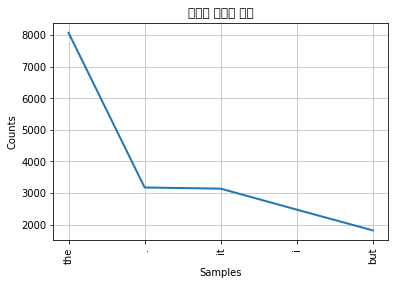

In [38]:
cfd["SS"].plot(5, title="문장의 첫단어 분포")
plt.show()

* i 다음에 올 수 있는 단어들

In [39]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

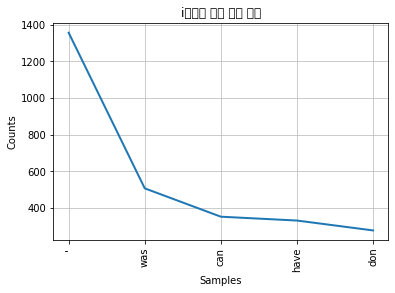

In [42]:
cfd["i"].plot(5,title="i다음에 오는 단어 분포")
plt.show()

* 마침표 다음에 올 수 있는 단어들

In [43]:
cfd["."].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

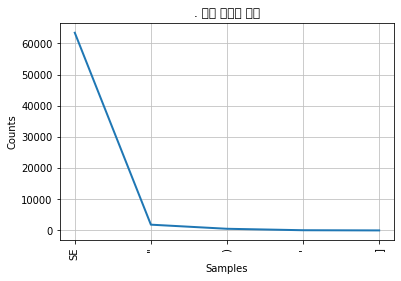

In [44]:
cfd["."].plot(5, title=". 다음 단어의 분포")
plt.show()

### step 3: 조건부 확률 추정

In [45]:
from nltk.probability import ConditionalProbDist, MLEProbDist
# MLEprobDIST어떤방식으로 추정했는지
cpd = ConditionalProbDist(cfd, MLEProbDist)

학습이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다.

In [46]:
# i다음에 am이 올 확률
cpd["i"].prob("am")

0.018562267971650354

In [47]:
cpd["i"].prob("is")

0.0002249971875351558

In [48]:
cpd["we"].prob("are")

0.08504504504504505

In [49]:
cpd["i"].prob("is")

0.0002249971875351558

### step 4: 문장 확률 계산

조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다. 


다음으로 이 토큰열을 N-그램형태로 분해한다.
바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률의 곱으로 나타난다.

$$ P(\text{SS I am a boy SE}) = P(\text{I}\;|\; \text{SS}) \cdot P(\text{am}\;|\; \text{I}) \cdot P(\text{a}\;|\; \text{am}) \cdot P(\text{boy}\;|\; \text{a}) \cdot P(.\;|\; \text{boy}) \cdot P(\text{SE}\;|\; .) $$



In [58]:
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
#         실수에서 가장 작은 수를 더해줌 log에는 0들어가면 안되니까 방지하기 위해
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [55]:
# 높은편 100만개의 문장 중에 이런문장하나있을수 있다는 뜻이니까
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [56]:
# 이건 굉장히 낮은 확률
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

In [57]:
test_sentence = ["we", "i", "you", ".", "movie"]
sentence_score(test_sentence)

2.1005637956336794e-49

In [60]:
test_sentence = ["watch", "the", "movie", "."]
sentence_score(test_sentence)

0.00035561058313947976

### step 5: 무작위 문장 생성

In [61]:
def generate_sentence():
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [66]:
# 무작위로 그럴듯한 한 문장을 만들어 내는
generate_sentence()

"The outtake footage that ' s firebird suite ."

In [67]:
# 교재에 한글문장 무작위도 있음

### Soynlp 소개
soynlp는 한국어 처리를 위한 파이썬 패키지 중 하나다. koNLPy에서 제공하는 형태소분석기는 형태소 기반으로 문서를 토큰화할 수 있는 기능을 제공하지만 새롭게 만들어진 미등록 단어들은 인식이 잘 되지 않는 단점을 가지고 있다. 이를 해결하기 위해서는 사용자 사전에 단어를 등록하는 절치를 거쳐야 한다. soynlp는 이러한 과정을 돕기 위해 사용자 사전과 형태소분석 없이 cohesion 기반으로 토큰화를 할 수 있는 기능을 제공한다.

In [73]:
# space 두개로 문장을 구분
from soynlp import DoublespaceLineCorpus

# '문서 단위' 말뭉치 생성 
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)  # 문서의 갯수

30091

In [74]:
# 앞 5개의 문서 인쇄
i = 0
for d in corpus:
    print(i, d)
    i += 1
    if i > 4:
        break

0 
1 19  1990  52 1 22
2 오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경

In [75]:
# '문장 단위' 말뭉치 생성 
corpus = DoublespaceLineCorpus("2016-10-20.txt", iter_sent=True)
len(corpus)  # 문장의 갯

223357

In [76]:
# 앞 5개의 문장 인쇄
i = 0
for d in corpus:
    print(i, d)
    i += 1
    if i > 4:
        break

0 19
1 1990
2 52 1 22
3 오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스
4 서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다


### 단어추출
WordExtractor 클래스를 사용하면 형태소에 해당하는 단어를 분리하는 학습을 수행한다.

In [77]:
%%time
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 0.752 Gbse memory 0.819 Gb
Wall time: 1min 7s


extract() 메서드로 각 cohesion, branching entropy, accessor variety 등의 통계 수치를 계산할 수 있다.

In [78]:
word_score = word_extractor.extract()

all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 360721
all accessor variety was computed # words = 360721


### Cohesion
```
Cohesion은 문자열을 글자단위로 분리하여 부분문자열(substring)을 만들 때 
왼쪽부터 문맥을 증가시키면서 각 문맥이 주어졌을 때 
그 다음 글자가 나올 확률을 계산하여 누적곱을 한 값이다.
```

In [79]:
word_score["연합"].cohesion_forward

0.1943363253634125

In [80]:
word_score["연합뉴"].cohesion_forward

0.43154839105434084

In [81]:
word_score["연합뉴스"].cohesion_forward

0.5710254410737682

In [82]:
word_score["연합뉴스는"].cohesion_forward

0.1535595043355021

### Branching Entropy
```
Branching Entropy는 조건부 확률의 값이 아니라 확률분포의 엔트로피값을 사용한다. 
만약 하나의 단어를 중간에서 끊으면 다음에 나올 글자는 쉽게 예측이 가능하다 

여러가지 글자 중 특정한 하나의 글자가 확률이 높다. 
따라서 엔트로피값이 0에 가까운 값으로 작아진다. 

하지만 하나의 단어가 완결되는 위치에는 다양한 조사나 결합어가 올 수 있으므로 
여러가지 글자의 확률이 비슷하게 나오고 따라서 엔트로피값이 높아진다.
```

In [83]:
# 연합 다음에는 여러가지가 나올수 있어 엔트로피 높게 나옴
word_score["연합"].right_branching_entropy

0.42721236711742844

In [85]:
# '연합뉴' 다음에는 항상 '스'만 나온다.-> 엔트로피 작게나옴
word_score["연합뉴"].right_branching_entropy

-0.0

In [86]:
# 다시 엔트로피 높아짐
word_score["연합뉴스"].right_branching_entropy

3.8967810761022053

In [87]:
word_score["연합뉴스는"].right_branching_entropy

0.410116318288409

### Accessor variaty
Accessor Variety는 확률분포를 구하지 않고 단순히 특정 문자열 다음에 나올 수 있는 글자의 종류만 계산한다. 
글자의 종류가 많다면 엔트로피가 높아지리 것이라고 추정하는 것이다.

In [88]:
word_score["연합"].right_accessor_variety

42

In [89]:
# '연합뉴' 다음에는 항상 '스'만 나온다.
word_score["연합뉴"].right_accessor_variety

1

In [90]:
word_score["연합뉴스"].right_accessor_variety

158

In [91]:
word_score["연합뉴스는"].right_accessor_variety

2

soynlp는 이렇게 계산된 통계수치를 사용하여 문자열을 토큰화하는 방법도 제공한다. 
soynlp가 제공하는 토큰화 방법은 두 가지다.

- 띄어쓰기가 잘 되어 있는 경우: L-토큰화
- 띄어쓰기가 안되어 있는 경우: Max Score 토큰화

### L-토큰화
```
한국어의 경우 공백(띄어쓰기)으로 분리된 하나의 문자열은 'L 토큰 + R 토큰' 구조인 경우가 많다.
왼쪽에 오는 L 토큰은 체언(명사, 대명사)이나 동사, 형용사 등이고 오른쪽에 오는 R 토큰은 조사, 동사, 형용사 등이다. 
여러가지 길이의 L 토큰의 점수를 비교하여 가장 점수가 높은 L단어를 찾는 것이 L-토큰화(L-tokenizing)이다. soynlp에서는 LTokenizer 클래스로 제공한다.
```

In [92]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score.items()}
l_tokenizer = LTokenizer(scores=scores)

l_tokenizer.tokenize("안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다", flatten=False)

[('안전', '성에'),
 ('문제', '있는'),
 ('스마트폰', '을'),
 ('휴대', '하고'),
 ('탑승', '할'),
 ('경우', '에'),
 ('압수', '한다')]

### 최대 점수 토큰화
```
최대 점수 토큰화(max score tokenizing)는 띄어쓰기가 되어 있지 않는 긴 문자열에서 
가능한 모든 종류의 부분문자열을 만들어서 가장 점수가 높은 것을 하나의 토큰으로 정한다. 
이 토큰을 제외하면 이 위치를 기준으로 전체 문자열이 다시 더 작은 문자열들로 나누어지는데 
이 문자열들에 대해 다시 한번 가장 점수가 높은 부분문자열을 찾는 것을 반복한다.
```

In [94]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("안전성에문제있는스마트폰을휴대하고탑승할경우에압수한다")

['안전',
 '성에',
 '문제',
 '있는',
 '스마트폰',
 '을',
 '휴대',
 '하고',
 '탑승',
 '할',
 '경우',
 '에',
 '압수',
 '한다']

### 단어 임베딩과 word2vec
단어 임베딩(Word Embedding)이란 텍스트를 구성하는 하나의 단어를 수치화하는 방법의 일종이다.
텍스트 분석에서 흔히 사용하는 방식은 단어 하나에 인덱스 정수를 할당하는 Bag of Words 방법이다.

#### Feed-Forward 신경망 언어 모형 (Neural Net Language Model)
```
i 는 입력 벡터  x  의 값이 1인 원소의 인덱스이다. 즉, BOW 단어장에서  i 번째 단어를 뜻한다.
이  wi  벡터 값을 해당 단어에 대한 분산 표현 (distributed representation) , 벡터 표현 (vector representation) 또는 단어 임베딩 (word embedding)이라고 한다.
벡터는 아무 값이나 나오는것이 아니고 단어에 내포된 정보..?같은게 나옴
```

### word2vec

In [95]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\shs40\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [96]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [98]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [99]:
from gensim.models.word2vec import Word2Vec

In [101]:
%%time
model=Word2Vec(sentences)

Wall time: 9.8 s


트레이닝이 완료되면 init_sims 명령으로 필요없는 메모리를 unload 시킨다

In [102]:
model.init_sims(replace=True)

이제 메서드 사용 가능
- similarity : 두 단어의 유사도 계산
- most_similar : 가장 유사한 단어를 출력

In [103]:
model.wv.similarity('actor', 'actress')

0.8513429

In [105]:
model.wv.similarity('actor', 'she')

0.22983098

In [106]:
# 가장 비슷한 위치에 있는 단어
model.wv.most_similar("accident")

[('bus', 0.8630172610282898),
 ('abandoned', 0.8623310327529907),
 ('boat', 0.8599128127098083),
 ('truck', 0.8569574952125549),
 ('plane', 0.8561625480651855),
 ('diner', 0.8559486269950867),
 ('meeting', 0.8551747798919678),
 ('radio', 0.8479107618331909),
 ('prison', 0.8441231846809387),
 ('desert', 0.8428150415420532)]

In [107]:
# she + (actor - actress) = he
model.wv.most_similar(positive=['she', 'actor'], negative='actress', topn=1)

[('he', 0.327182799577713)]

### 이미지 처리 기초

### 픽셀

```
이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것이다. 
각 픽셀은 단색의 직사각형이다. 전체 이미지의 크기를 표현할 때는 (세로픽셀수 x 가로픽셀수) 형식으로 표현한다.
```

### 그레이스케일
```
그레이스케일에서는 모든 색이 흑백이다. 각 픽셀은 명도를 나타내는 숫자로 표현된다. 
0은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 된다. 숫자는 보통 0~255의 8비트 부호없는 정수로 저장된다.
```

In [109]:
# 샘플 이미지 제공
import scipy as sp

img_gray = sp.misc.face(gray=True)
img_gray.shape

(768, 1024)

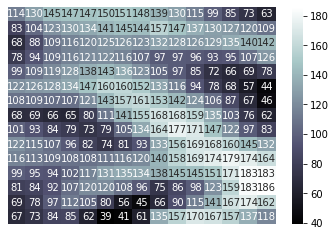

In [110]:
import matplotlib.pylab as plt
import seaborn as sns
# 샘플이미지 왼쪽 위 15x15만큼만 보여줌
sns.heatmap(img_gray[:15, :15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

### RGB
```
RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현된다. 
8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색이다.
세장으로 RGB를 표현 -> tensor가 됨
```

In [112]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()   
img_rgb = dataset.images[1]
img_rgb.shape
# 427X640인게 세장이 있다(RGB세장)

(427, 640, 3)

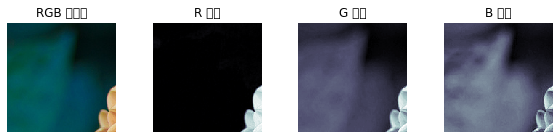

In [113]:
plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB 이미지")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R 채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G 채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B 채널")

plt.show()

### HSV
HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현된다.

- 색상(Hue): 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0°~360°의 범위를 갖고 360°와 0°는 빨강을 가리킨다.
- 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
- 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다.

In [114]:
# 채도가 100일떄 색공간 시각화
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V))
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [115]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [116]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [117]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

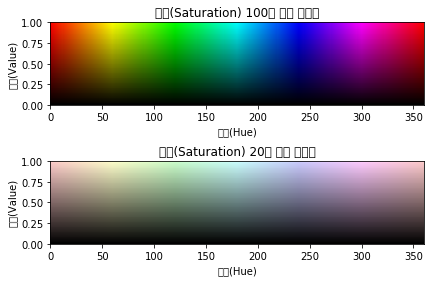

In [121]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일 때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일 때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show()

```
HSV 색공간으로 표현된 파일은 imshow 명령으로 바로 볼 수 없다. 
이외에도 RGB, HSV 색공간에 투명도(transparency)를 표현하는 
A(Alpha) 채널이 추가된 RGBA, HSVA 등의 색공간도 있다.
```

### 이미지 파일 형식
```
.bmp 확장자를 가지는 비트맵(bitmap) 파일은 지금까지 설명한 다차원 배열정보를 그대로 담고있다. 
하지만 비트맵 파일은 파일 용량이 크기 때문에 압축을 통해 
용량을 줄인 JPG, GIF, PNG 등의 압축 파일 형식도 많이 사용한다.
```

- JPEG : JPEG는 Joint Picture Experts Group의 약자로 이미지 압축 기술자 모임인 JPEG 위원회에서 개발한 이미지 파일 형식이다. JPEG 파일은 웹상 및 멀티미디어 환경에서 가장 널리 사용되고 있는 포맷이다. JPG라는 확장자도 같이 사용된다.

    - 장점
        RGB모드와 CMYK모드를 둘 다 지원한다.
        RGB 이미지의 모든 컬러 정보를 유지한다.
        이미지를 만드는 사람이 이미지의 질과 파일의 크기를 손실압축방식을 통해 조정할 수 있다.
    - 단점
        투명 이미지를 지원하지 않는다.
        압축율을 높일 수록 이미지의 질이 손상된다.
        레이어와 알파채널을 지원하지 않는다.
- GIF : GIF는 Graphics Interchange Format의 약자로 1987년 미국의 통신업체인 컴퓨서브(Compuserve)에서 개발한 포맷이다.

    - 장점
        하나의 파일에 여러 비트맵을 저장하여 다중 프레임 애니메이션을 구현 할 수 있다.
        투명 이미지를 지원한다.
        애니메이션을 특별한 플러그인 없이 여러 환경에서 쉽게 적용할 수 있다.
    - 단점
        8비트 256 컬러로 제한된다.
- png : PNG는 Potable Network Graphics의 약자이다. GIF 포맷을 대체하기 위해 개발된 파일 포맷이다.

    - PNG의 장점
        비손실 압축방식으로 원본에 손상 없이 파일의 크기를 줄여준다.
        이미지의 모든 컬러정보와 알파 채널을 보존하고 있으므로 포토샵에서 활용하기 용이하다.
        문자 혹은 날카로운 경계가 있는 이미지인 경우 JPG보다 PNG가 효과적이다.
    - PNG의 단점
        애니메이션을 만들 수 없다.
        JPG 와 GIF보다 용량이 크다.

### Pillow를 이용한 이미지 처리

In [124]:
import PIL
PIL.__version__

'7.0.0'

### 이미지 읽고 쓰기

In [125]:
from PIL import Image

img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

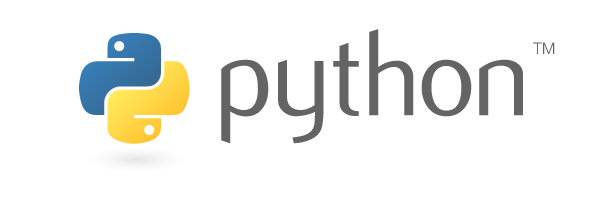

In [126]:
img_logo_png

In [127]:
# 파일로 저장할 때는 save 메서드를 사용한다. 이 때 확장자를 지정하면 해당 이미지 형식으로 자동 변환하여 저장한다.
img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp")

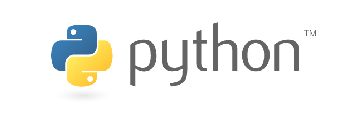

In [128]:
# 이미지 데이터 처리를 위해 Image 클래스 객체를 NumPy 배열로 변환할 때는 np.array 함수를 사용한다. 
# NumPy 배열이 되면 matplotlib의 imshow 명령으로 볼 수 있다.
img_logo_array = np.array(img_logo_bmp)

plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

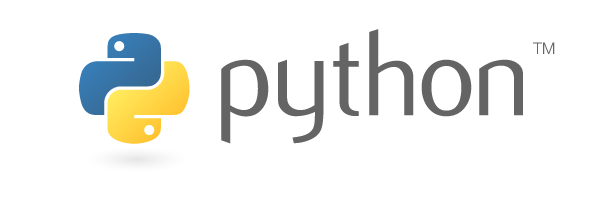

In [129]:
# array를 image로
Image.fromarray(img_logo_array)

#### 이미지 크기 변환

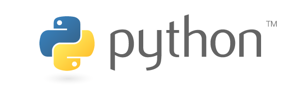

In [130]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

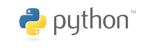

In [131]:
# 썸네일(thumbnail) 이미지를 만들고 싶다면 Image객체의 thumbnail 메서드를 사용한다. 
# thumbnail 메서드는 원래 객체 자체를 바꾸는 인플레이스(in-place) 메소드이므로 주의하여 사용한다.
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

#### 이미지 회전

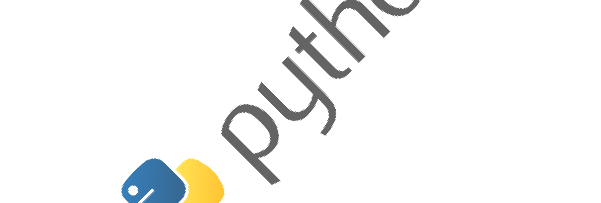

In [132]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

#### 이미지 잘라내기

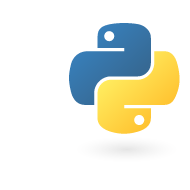

In [133]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

### Scikit-Image
OpenCV를 더 많이 사용하게 될 것

In [134]:
import skimage
skimage.__version__

'0.16.2'

#### 샘플이미지

In [146]:
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

#### 이미지 읽고 쓰기

In [147]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

#### 색공간 변환

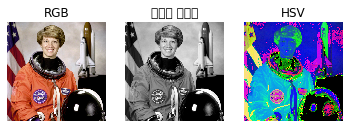

In [148]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("그레이 스케일")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

### OpenCV
```
OpenCV(Open Source Computer Vision)은 이미지 처리, 컴퓨터 비전을 위한 라이브러리이다. 
Windows, Linux, OS X(Mac OS), iOS, Android 등 다양한 플랫폼을 지원한다.
실시간 이미지 프로세싱에 중점을 둔 라이브러리이며 많은 영상처리 알고리즘을 구현해 놓았다.
```

In [149]:
import cv2
cv2.__version__

'4.2.0'

#### 파일 읽고 쓰기

In [150]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(512, 512, 3)

In [157]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro3)

In [158]:
# 예전엔 bgr로 입력됐었기 ㄷ때
# b, r을 서로 바꿔서 Merge
img_astro3_rgb = cv2.merge([r, g, b])

In [153]:
# cvtColor 명령을 사용하면 더 간단하게 색공간을 변환할 수도 있다.
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

In [ ]:
# 이미지 파일을 만들 때는 imwrite 명령을 사용한다.
cv2.imwrite("./gray_astronaut.png", img_astro3_gray)

### 이미지 크기 변환

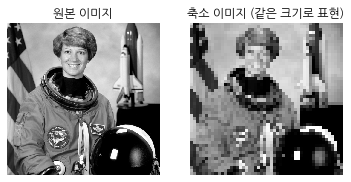

In [156]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("원본 이미지")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("축소 이미지 (같은 크기로 표현)")
plt.axis("off")

plt.show()


### 이미지 필터링
색을 다른 색으로 변경하는 

#### 임계처리
```
임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 
사용자가 지정한 기준값(threshold)를 사용하여 이진화(binarization)하는 가장 단순한 필터다.
흑백만 처리 가능
```

```
threshold(src, thresh, maxval, type)
- src : 그레이 스케일 이미지
- thresh : 기준값
- maxval : 기준값을 넘었을 때 적용할 최대값
- type : 임계처리 유형
    - THRESH_BINARY : 기준값을 넘으면 최대값 아니면 0
    - THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
    - THRESH_TRUNC : 기준값을 넘으면 기준값 아니면 최대값
    - THRESH_TOZERO : 기준값을 넘으면 원래값 아니면 0
    - THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값
    
검정색0 흰색255
```

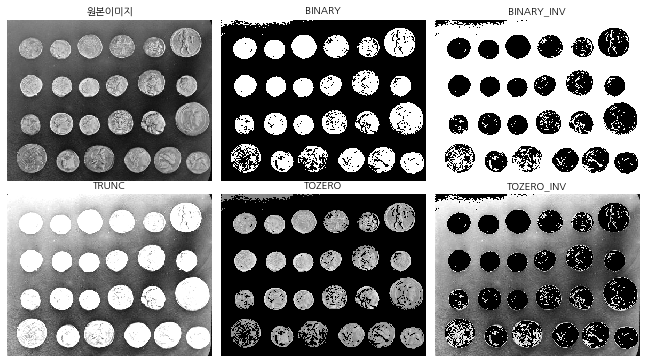

In [160]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

In [162]:
# 흰검으로 바꾸는데 type에 따라 다르게
# 경계선을 추출하기 쉽게하기 위한 목적

### 적응임계처리
```
임계처리의 경우는 이미지 전체에 하나의 기준값을 적용한다. 
적응임계처리는 일정한 영역 내의 이웃한 픽셀들의 값들을 이용하여 
'해당 영역에 적용할 기준값을 자체적으로 계산한다.'
```

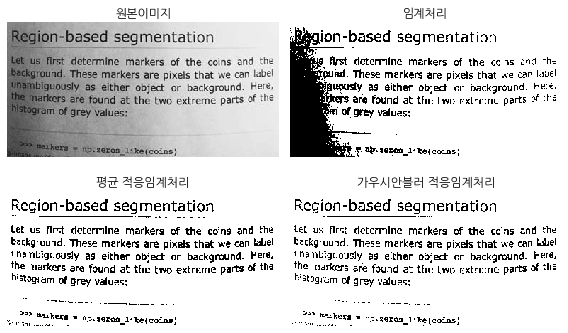

In [163]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### 이미지 필터링
```
이미지 필터링(image filtering)은 필터(filter) 또는 커널(kernel) 또는 윈도우(window)라고 하는 
정방행렬을 정의하고 이 커널을 이동시키면서 같은 이미지 영역과 곱하여 
그 결과값을 이미지의 해당 위치의 값으로 하는 새로운 이미지를 만드는 연산이다. 기호  ⊗ 로 표기한다.

일정 부분의 픽셀값의 평균을 구하는데 이동시켜가면서 구해 전체 이미지를 구함 
결과적으로는 이미지가 뭉개짐
평균을 구하는 부분의 크기가 클수록 더 넓은 부분을 뭉치는 것이니까 이미지 더 흐릿해짐
가중치를 동일하게 주는것이 아닌 다르게 주면 오히려 더 또력해지기도함 

가장자리는 패딩 -> 흰색 혹은 가짜이미지 처리 보통 흰색으로 함 패딩 안할때도
```

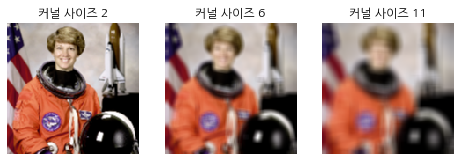

In [164]:
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title("커널 사이즈 {}".format(k))
    plt.axis("off")

plt.show()

### 블러
```
블러는 이미지 필터링을 사용하여 이미지를 흐리게 만드는 것을 말한다. 
노이즈를 제거하거나 경계선을 흐리게 하기 위해 쓴다.
평균을 많이 이용
```

#### 평균블러

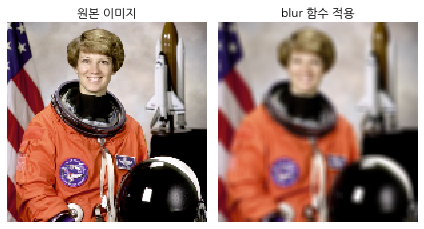

In [165]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("원본 이미지")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("blur 함수 적용")
plt.axis('off')

plt.tight_layout()
plt.show()

#### 중앙값 블러(점모양잡음제거)

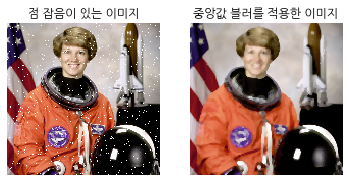

In [166]:
# 점 잡음 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("점 잡음이 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("중앙값 블러를 적용한 이미지")
plt.axis('off')
plt.show()

#### 가우시안 블러(굉장히 넓은범위에 적용 이미지 전반에..)

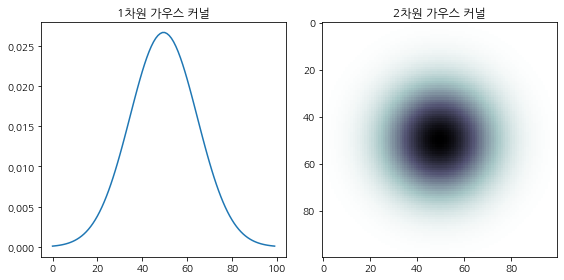

In [167]:
gauss1d = cv2.getGaussianKernel(100, 15)
gauss2d = gauss1d @ gauss1d.T

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("1차원 가우스 커널")

plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title("2차원 가우스 커널")

plt.tight_layout()
plt.show()

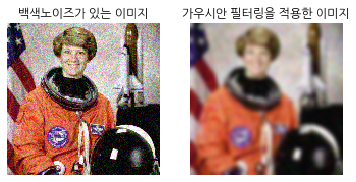

In [168]:
# 백색 잡음
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')

# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("백색노이즈가 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

#### 양방향 필터링
두 픽셀과의 거리 뿐 아니라 두 픽셀의 명암값의 차이도 커널에 넣어서 가중치로 곱한다.
값이 차이나면 뭉게지 않는다는 의미 (경계선같은 부분은 살려 준다는것)

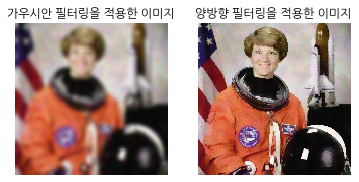

In [171]:
# 이미지의 라인(경계선)이 살아있음
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title("양방향 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

### 형태학적 변환
```
이진화한 이미지에서는 같은 값을 가진 픽셀이 이웃하여 있으면 이를 형태학적 영역(morphological region)으로 생각할 수 있다. 
이미지의 형태학적 변환(morphological transformation)은 이미지 필터링을 사용하여 영역을 변화시키는 방법이다.
윈도우(주변값)에서 최소 혹은 최대를 찾아 그걸로 그 영역을 다 채움
위방법들과 다르게,,? 하얀색 아니면 검정색으로 이진화 됨
```

In [172]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [173]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [174]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

#### 침식 기법
```
침식 기법은 각 픽셀에 커널을 적용하여 커널 영역 내의 최솟값(어두운색)으로 해당 픽셀을 대체한다. 
이진화된 이미지에서는 0인 영역이 증가한다.
경계선을 따라 어두운색으로 훑고 지나가는 느낌인듯함,, 축소되는..
```

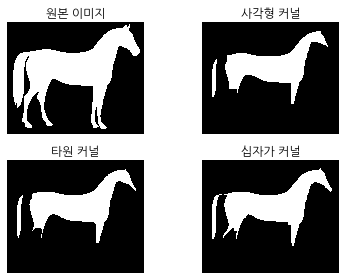

In [176]:
# 어두운 영역이 흰부분을 파고든다(침식)
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["사각형 커널", "타원 커널", "십자가 커널"]

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [179]:
# 사각형커널은 커널이 사각형이라서 사각형 모양으로 지워짐
# 스트라이딩 하는것(처음부터 끝까지 쓸고 지나감)

#### 팽창
```
팽창(Dilation)은 침식과 반대로 커널 영역내의 최댓값(가장 밝은값)으로 해당 픽셀을 대체하는 것이다. 
OpenCV에서는 dilate 함수로 구현되어 있다.
경계선을따라 최댓값으로(밝은색)으로 훑고 지나가는 느낌
```

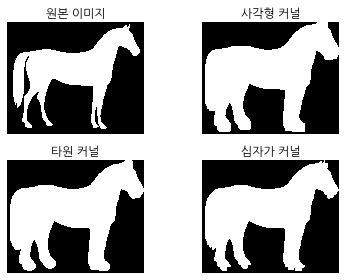

In [181]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

#### 그레디언트, 오프닝, 클로징
```
그레디언트는 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 것이다.
오프닝은 침식을 적용한 뒤 팽창을 적용하는 것으로 영역이 점점 둥글게 되므로 점 잡음, 작은 물체, 돌기 등을 제거하는데 적합하다. 
클로징은 반대로 팽창을 적용한 뒤 침식을 적용하여 영역이 영역이 붙기 때문에 전체적인 윤곽을 파악하는데 적합하다.
```

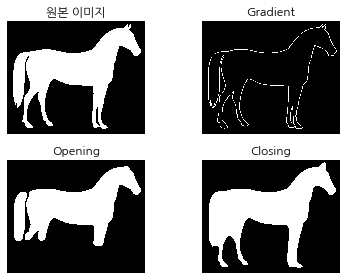

In [182]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["원본 이미지", 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

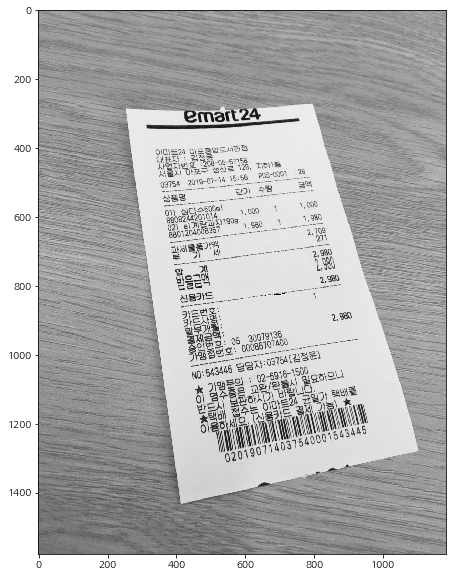

In [190]:
from skimage.data import page
img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 흑백으로 변환

plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.gray)
plt.grid(False)
plt.show()

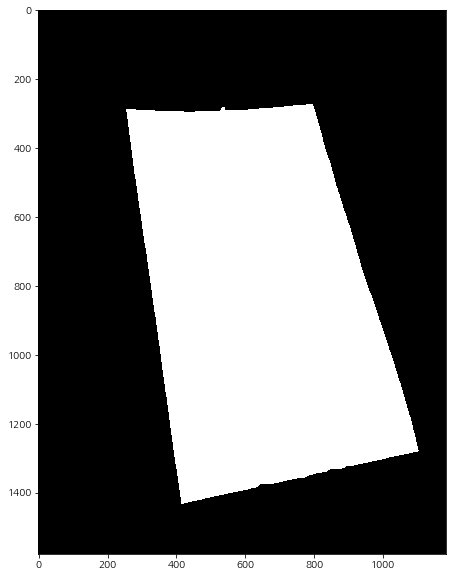

In [198]:
# 임계 처리
maxval=10
thresh=200 
_,thresh=cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY)

# medianBlur로 노이즈 제거
img_denoise=cv2.medianBlur(thresh,3)

img_region = cv2.morphologyEx(img_denoise, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_RECT, (28, 28)), 
)


plt.figure(figsize=(10,10))
plt.imshow(img_region,cmap="gray")
plt.grid(False)
plt.show()

### 이미지 컨투어
```
컨투어(contour)란 동일한 색 또는 동일한 픽셀값(강도,intensity)을 가지고 있는 영역의 경계선 정보다. 
물체의 윤곽선, 외형을 파악하는데 사용된다.
```

In [200]:
import cv2
from skimage.data import horse

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [201]:
len(contours)

2

In [202]:
contours[0].shape

(312, 1, 2)

In [203]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

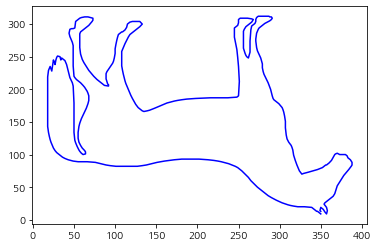

In [204]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="b")
plt.show()

###### 상하구조(hierarchy)는 1, 0, -1 값으로 이루어진 (컨투어 수 x 4) 크기의 행렬이다.
```
1번 원소: 같은 수준의 다음 컨투어의 인덱스. 같은 수준의 다음 컨투어가 없으면 -1
2번 원소: 같은 수준의 이전 컨투어의 인덱스. 같은 수준의 이전 컨투어가 없으면 -1
3번 원소: 하위 자식 컨투어의 인덱스. 가장 하위의 컨투어면 -1
4번 원소: 부모 컨투어의 인덱스. 가장 상위의 컨투어면 -1
```

In [206]:
hierachy #같은 열에 있는 정보가 형제 컨투어인애들( 같은 등고선을 갖는)
# 컨투어라인이 두개가 찾아졌다는 의미

array([[[-1, -1,  1, -1],
        [-1, -1, -1,  0]]], dtype=int32)

#### drawContours 함수를 사용하면 컨투어 정보에서 비트맵 이미지를 만들 수 있다.

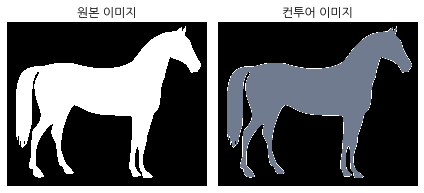

In [207]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("컨투어 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

### 컨투어 특징

#### 이미지 모멘트
```
이미지 모멘트는 컨투어에 관한 특징값을 뜻한다. OpenCV에서는 moments 함수로 이미지 모멘트를 구한다. 
컨투어 포인트 배열을 입력하면 해당 컨투어의 모멘트를 딕셔너리 타입으로 반환한다. 
반환하는 모멘트는 총 24개로 10개의 위치 모멘트, 7개의 중심 모멘트, 7개의 정규화된 중심 모멘트로 이루어져 있다.
```

In [208]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

In [209]:
# 컨투어의 면적은 c0모멘트 값
cv2.contourArea(c0)

42355.0

In [210]:
# 컨투어의 둘레는 arcLength 함수로 구할 수 있다. 
# 두번째 파라미터인 closed의 의미는 폐곡선의 여부로, 설정한 값이 True 일 때는 컨투어의 시작점과 끝점을 이어 도형을 구성하고 그 둘레 값을 계산한다. 
# False인 경우 시작점과 끝점을 잇지 않고 둘레를 계산한다.
cv2.arcLength(c0, closed=True), cv2.arcLength(c0, closed=False)

(2203.678272008896, 2199.678272008896)

In [211]:
# 컨투어를 둘러싸는 박스
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h

(18, 9, 371, 304)

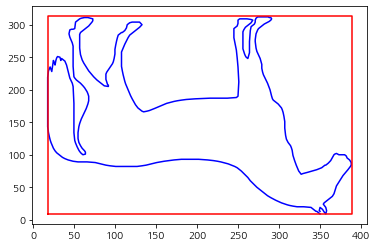

In [212]:
plt.plot(x0, y0, c="b")
plt.plot(
    [x, x + w, x + w, x, x], 
    [y, y, y + h, y + h, y],
    c="r"
)
plt.show()

In [213]:
# 가로세로비율
aspect_ratio = float(w) / h
aspect_ratio

1.2203947368421053

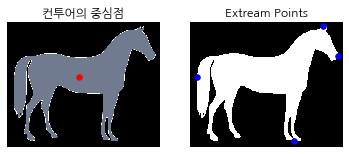

In [214]:
# 컨투어 라인의 중심점과 좌우상하의 끝점은 다음처럼 구한다.
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.subplot(1,2,1)
plt.imshow(image, cmap='bone')
plt.title("컨투어의 중심점")
plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)

plt.subplot(1,2,2)
plt.imshow(img_raw, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="b", s=30)
plt.title("Extream Points")

plt.show()

### 영수증 이미지의 끝점 찾기

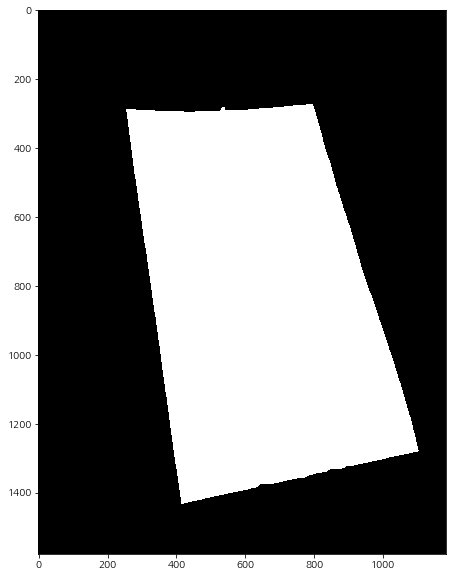

In [218]:
img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 흑백으로 변환
# 끝점 찾을때는 원본 영수증 이미지가 아닌 흑백으로 경계가 구분된 아래 이미지 사용
# 임계 처리
maxval=10
thresh=200 
_,thresh=cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY)

# medianBlur로 노이즈 제거
img_denoise=cv2.medianBlur(thresh,3)

img_region = cv2.morphologyEx(img_denoise, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_RECT, (28, 28)), 
)


plt.figure(figsize=(10,10))
plt.imshow(img_region,cmap="gray")
plt.grid(False)
plt.show()

In [219]:
contours, hierachy = cv2.findContours(img_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [221]:
c0 = contours[0]
M = cv2.moments(c0)

In [222]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])


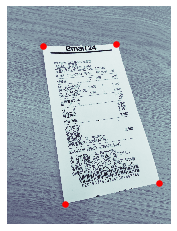

In [225]:
plt.imshow(img, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="r", s=30)